# Librairies

In [79]:
from datetime import datetime
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Model
from keras.layers import Input, Dense, LSTM, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn import preprocessing

# Files paths

In [80]:
confirmed_path = "data/time_series_covid19_confirmed_global.csv"
deaths_path =  "data/time_series_covid19_deaths_global.csv"
recovered_path = "data/time_series_covid19_recovered_global.csv"

# Read data

In [81]:
confirmed_data = pd.read_csv(confirmed_path)
deaths_data = pd.read_csv(deaths_path)
recovered_data = pd.read_csv(recovered_path)

In [82]:
confirmed_data.head(5)

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,745,745,747,748,750,751,751,752,752,754
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,27,30,35,35,35,36,36,36,43,43


In [83]:
confirmed_data.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
count,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,266.000000,...,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02,2.660000e+02
mean,21.259359,22.432499,2.086466,2.458647,3.537594,5.390977,7.962406,11.003759,20.969925,23.180451,...,1.224402e+04,1.257059e+04,1.288565e+04,1.318319e+04,1.347013e+04,1.376952e+04,1.412056e+04,1.445759e+04,1.480475e+04,1.512785e+04
std,24.747943,70.478908,27.279200,27.377862,34.083035,47.434934,66.289178,89.313757,219.187744,220.524977,...,7.102976e+04,7.311436e+04,7.495782e+04,7.657327e+04,7.801568e+04,7.957189e+04,8.125646e+04,8.306894e+04,8.484777e+04,8.652542e+04
min,-51.796300,-135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.907750,-18.093125,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.725000e+01,8.100000e+01,8.200000e+01,8.225000e+01,8.675000e+01,9.350000e+01,9.525000e+01,9.650000e+01,1.012500e+02,1.077500e+02
50%,23.488100,20.921188,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,4.665000e+02,4.855000e+02,4.995000e+02,5.085000e+02,5.425000e+02,5.480000e+02,5.560000e+02,5.625000e+02,5.860000e+02,6.190000e+02
75%,41.143200,77.191525,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.105250e+03,2.165750e+03,2.359250e+03,2.515000e+03,2.635750e+03,2.699750e+03,2.872750e+03,2.939500e+03,3.021750e+03,3.040750e+03
max,71.706900,178.065000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,1.069424e+06,1.103461e+06,1.132539e+06,1.158040e+06,1.180375e+06,1.204351e+06,1.229331e+06,1.257023e+06,1.283929e+06,1.309550e+06


In [84]:
print(confirmed_data.shape)   #(266, 118)
print(deaths_data.shape)      #(266, 118)
print(recovered_data.shape)   #(253, 118)

(266, 113)
(266, 113)
(252, 113)


In [85]:
# columns name
assert confirmed_data.columns.all() == deaths_data.columns.all()
assert recovered_data.columns.all() == confirmed_data.columns.all()
columns_name = confirmed_data.columns
columns_name

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20',
       '5/7/20', '5/8/20', '5/9/20'],
      dtype='object', length=113)

In [86]:
dates = columns_name[4:]
print(len(dates),'dates','\nfrom',dates[0],'to',dates[-1])

109 dates 
from 1/22/20 to 5/9/20


# Data row index

In [87]:
## on a les pays en row index
row_index = confirmed_data['Country/Region'].to_list()
#On a des doublons donc il faudra surement traiter nos données par des groupby.
print(len(row_index),'pays')
pays = np.unique(row_index)
print(len(pays),'uniques pays')

266 pays
187 uniques pays


In [88]:
## Recuperation des pays avec des Grouby en sommant

def dataframe_wiht_unique_contries(dataframe):
    '''we have doublons for the country because there are some Province
    so we need a groupby countrie and sum to have same lenght in all our dataset'''

    df = dataframe.groupby('Country/Region').sum().reset_index()
    return df

In [89]:
confirmed_df = dataframe_wiht_unique_contries(confirmed_data)
deaths_df = dataframe_wiht_unique_contries(deaths_data)
recovered_df = dataframe_wiht_unique_contries(recovered_data)

print(confirmed_df.shape) #(188, 117)
print(deaths_df.shape)    #(188, 117)
print(recovered_df.shape) #(188, 117)

(187, 112)
(187, 112)
(187, 112)


In [90]:
confirmed_df.head(3)

,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20
0,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,...,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033
1,Albania,41.1533,20.1683,0,0,0,0,0,0,0,...,773,782,789,795,803,820,832,842,850,856
2,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,...,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558


In [91]:
## Garder uniquement les n pays avec le plus grands nombre de confirmed

def recup_n_country_most_volumed(dataframe_cumul,n):
    '''from the dataframe give us the n country with most volume'''

    volume = dataframe_cumul.iloc[:,-1] #last columns of cumul dataframe so volume total
    ind_most_vol = volume.argsort()[::-1] #list of index and reverse to have descending oreder
    countries = dataframe_cumul['Country/Region'][ind_most_vol][:n]

    return countries

In [92]:
countries = recup_n_country_most_volumed(confirmed_df,13)
countries

173                US
157             Spain
85              Italy
177    United Kingdom
139            Russia
62             France
66            Germany
23             Brazil
172            Turkey
81               Iran
36              China
32             Canada
133              Peru
Name: Country/Region, dtype: object

On ne garde que les 13 pays qui à la date du 1er mai 2020 comptaient le plus grand nombre de décès cumulé. Créez une variable country_set de type np.array qui contient le nom de ces 13 pays.

In [93]:
## Garder uniquement les n pays a une date precise

def recup_n_country_most_at_date(dataframe,date,n=-1):
    '''from the dataframe give us the n most countries at one date
    if dataframe is cumul so it's most volumed at one date
    if dataframe is daily so it's most cases at one date'''

    # on teste le format des dates sur la derniere colonne 
    if isinstance(dataframe.columns[-1], str) and isinstance(date, str):
        '''si les dates sont au format str'''
        value_at_date = dataframe.loc[:,date]

    elif isinstance(dataframe.columns[-1], pd.Timestamp) and isinstance(date,str):
        '''si les dates sont au format datetime'''
        date = datetime.strptime(date,"%Y-%m-%d")
        value_at_date = dataframe.loc[:,date]

    elif isinstance(date, int):
        '''si on met un entier en tant que date'''
        value_at_date = dataframe.iloc[:,date]

    classement = value_at_date.argsort()[::-1] #classement index with most at top
    countries = dataframe['Country/Region'][classement][:n]

    return np.array(countries)

In [94]:
# la date est au format "mois/jour/20"
country_set  = recup_n_country_most_at_date(confirmed_df,"5/1/20",13)
country_set

array(['US', 'Spain', 'Italy', 'United Kingdom', 'France', 'Germany',
       'Turkey', 'Russia', 'Iran', 'Brazil', 'China', 'Canada', 'Belgium'],
      dtype=object)

# Data columns index


In [95]:
## On va generer un index temporel
def generate_date_index(start,end):

    '''from start & end in string format, give us a date_index between start and end'''
    from datetime import datetime,date,time
    import pandas as pd

    t_min = datetime.strptime(start,"%Y-%m-%d")
    t_max = datetime.strptime(end,"%Y-%m-%d")

    #Generate date between start and end
    date_index = pd.date_range(start=t_min, end=t_max) 
    date_index = [d for d in date_index] #each element is in Timestamp format

    return date_index

In [96]:
date_index = generate_date_index('2020-01-22','2020-05-09')
#date_index

In [97]:
## Renommer les colonnes via le date index

def rename_date_columns(dataframe,date_index,ind_1rst_date_in_column=4):
    '''from dataframe with date as string for some columns
    rename those columns with date as Timestamp given by the date_index'''

    dates = dataframe.columns[ind_1rst_date_in_column:] #list of date (format str)
    col_mapping = {dates[i] : date_index[i] for i in range(len(date_index))}

    dataframe.rename(columns=col_mapping, inplace=True)

    return

In [98]:
rename_date_columns(confirmed_df,date_index,3)
rename_date_columns(deaths_df,date_index,3)
rename_date_columns(recovered_df,date_index,3)

# Filtering data

Filtrez les DataFrame confirmed_data, deat_data et recovered_data en ne conservant uniquement les données associées aux 13 pays concernés.

In [99]:
# country_set nous donne la liste de n pays à garder
confirmed = confirmed_df[confirmed_df['Country/Region'].isin(country_set)]
deaths = deaths_df[deaths_df['Country/Region'].isin(country_set)]
recovered = recovered_df[recovered_df['Country/Region'].isin(country_set)]
confirmed.head(3)

,Country/Region,Lat,Long,2020-01-22 00:00:00,2020-01-23 00:00:00,2020-01-24 00:00:00,2020-01-25 00:00:00,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,...,2020-04-30 00:00:00,2020-05-01 00:00:00,2020-05-02 00:00:00,2020-05-03 00:00:00,2020-05-04 00:00:00,2020-05-05 00:00:00,2020-05-06 00:00:00,2020-05-07 00:00:00,2020-05-08 00:00:00,2020-05-09 00:00:00
16,Belgium,50.8333,4.0000,0,0,0,0,0,0,0,...,48519,49032,49517,49906,50267,50509,50781,51420,52011,52596
23,Brazil,-14.2350,-51.9253,0,0,0,0,0,0,0,...,87187,92202,97100,101826,108620,115455,126611,135773,146894,156061
32,Canada,671.7607,-1237.6289,0,0,0,0,1,1,2,...,54457,56343,57926,60504,61957,63215,64694,66201,67674,68918


In [100]:
## Renommer les index Avec le nom des pays ##
confirmed.index = confirmed['Country/Region']
deaths.index = deaths['Country/Region']
recovered.index = recovered['Country/Region']

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


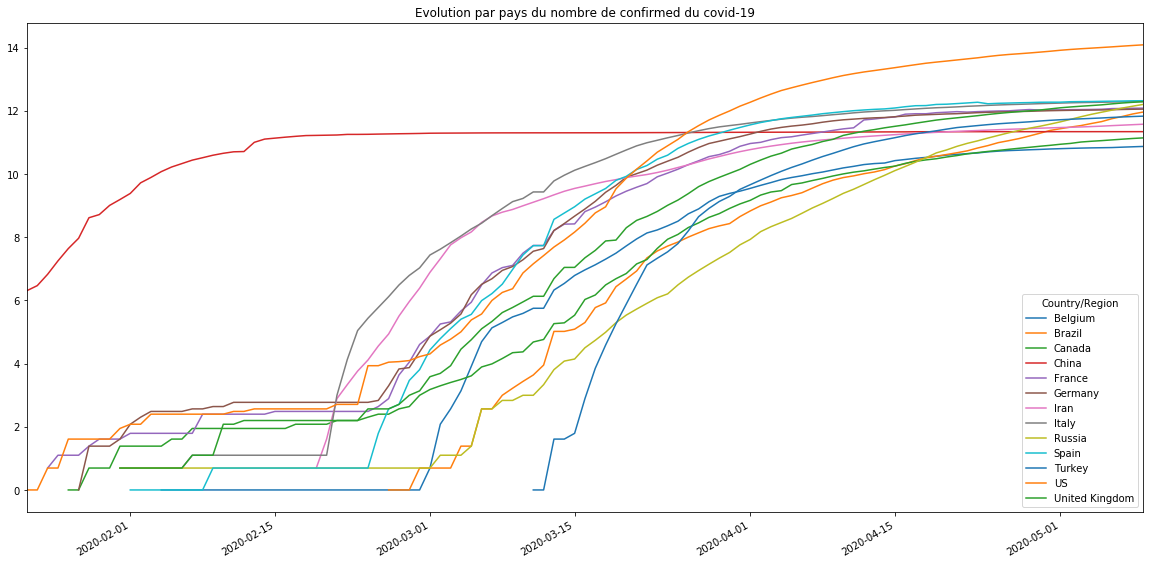

In [101]:
## Visualisation
np.log(confirmed.iloc[:,3:].transpose()).plot(figsize=(20,10),title='Evolution par pays du nombre de confirmed du covid-19')

In [102]:
## Pour avoir les données entre 2 dates précises au format datetime
start = datetime.strptime("2020-01-26", '%Y-%m-%d')
end = datetime.strptime("2020-02-01", '%Y-%m-%d')
confirmed_df[confirmed_df['Country/Region'].isin(country_set)].loc[:,start:end]

,2020-01-26 00:00:00,2020-01-27 00:00:00,2020-01-28 00:00:00,2020-01-29 00:00:00,2020-01-30 00:00:00,2020-01-31 00:00:00,2020-02-01 00:00:00
16,0,0,0,0,0,0,0
23,0,0,0,0,0,0,0
32,1,1,2,2,2,4,4
36,2075,2877,5509,6087,8141,9802,11891
62,3,3,4,5,5,5,6
66,0,1,4,4,4,5,8
81,0,0,0,0,0,0,0
85,0,0,0,0,0,2,2
139,0,0,0,0,0,2,2
157,0,0,0,0,0,0,1


# Transformation Daily

In [103]:
# Daily new confirmed case
def from_cumul_to_daily(data_cumul):
    '''from a dataframe with cumul value each date give us a dataframe with each date new case''' 

    data_daily = np.matrix(data_cumul) # Put df as a matrix
    # variation
    data_daily = pd.DataFrame(data_daily[:,1:] - data_daily[:,:-1])  
    data_daily.columns = date_index[1:]

    return data_daily

In [104]:
confirmed_df_daily = from_cumul_to_daily(confirmed_df.iloc[:,3:])
deaths_df_daily = from_cumul_to_daily(deaths_df.iloc[:,3:])
recovered_df_daily = from_cumul_to_daily(recovered_df.iloc[:,3:])

In [105]:
confirmed_df_daily.shape

(187, 108)

# Counter et Stats

In [106]:
## Pays avec le plus de nouveaux mort pendant la plus grande periode

def from_daily_to_dict_of_days_at_max(data_daily,countries_list):
    '''from the dataframe with all daily new cases give us a list 
    with the country with max new case at each date and after that give us a dict 
    with country as key and count of the country in the list as value'''

    countries_max = [countries_list[i] for i in np.squeeze(np.array(np.argmax(np.matrix(data_daily),axis=0)))]
    counter_by_country = Counter(countries_max)

    return counter_by_country

In [107]:
confirmed_counter = from_daily_to_dict_of_days_at_max(confirmed_df_daily.iloc[:,:32],pays)
deaths_counter = from_daily_to_dict_of_days_at_max(deaths_df_daily,pays)
recovered_counter = from_daily_to_dict_of_days_at_max(recovered_df_daily,pays)

In [108]:
print('Confirmed Sur 32jours :',confirmed_counter)
print('Deaths Sur le total :',deaths_counter)

Confirmed Sur 32jours : Counter({'China': 31, 'Korea, South': 1})
Deaths Sur le total : Counter({'China': 40, 'US': 40, 'Italy': 21, 'Spain': 4, 'Iran': 2, 'Korea, South': 1})


# Genererer 1 Matrice shape (N,T,3)

In [109]:
def generate_1_matrix_from_3_matrix(data1,data2,data3):
    '''
    from 3 dataframe with DatetimeIndex and shape (nb_pays,nb_dates) 
    give us one matrix of shape (nb_pays,nb_dates,3)
    '''
    #assert isinstance(data1.index, pd.DatetimeIndex), "data1 must be transposed to have DatetimeIndex"
    #assert isinstance(data2.index, pd.DatetimeIndex), "data2 must be transposed to have DatetimeIndex"
    #assert isinstance(data3.index, pd.DatetimeIndex), "data3 must be transposed to have DatetimeIndex"

    assert isinstance(data1, pd.DataFrame), "data1 must be a DataFrame"
    assert isinstance(data2, pd.DataFrame), "data2 must be a DataFrame"
    assert isinstance(data3, pd.DataFrame), "data3 must be a DataFrame"

    M1 = np.matrix(data1)
    M2 = np.matrix(data2)
    M3 = np.matrix(data3)

    new_matrix = []
    for i in range(M3.shape[0]):
        m1 = M1[i]
        m2 = M2[i]
        m3 = M3[i]
        new_matrix.append([m1,m2,m3])
  
    M = np.squeeze(np.array(new_matrix))
    assert M.shape == (M1.shape[0],3,M1.shape[1]) , "shape error after first loop"

    new_M = np.zeros((M1.shape[0],M1.shape[1],3))
    for i in range(M.shape[0]):
        for j in range(M.shape[2]):
            new_M[i][j][0]= M[i][0][j]
            new_M[i][j][1] = M[i][1][j]
            new_M[i][j][2] = M[i][2][j]

    print('new_m :',new_M.shape)
    assert new_M.shape == (M.shape[0],M.shape[2],3), "shape error after 2nd loop"

    return M

In [110]:
M = generate_1_matrix_from_3_matrix(confirmed_df_daily,deaths_df_daily,recovered_df_daily)
print('M :',M.shape)

new_m : (187, 108, 3)
M : (187, 3, 108)


# Visualisation

Tracez sur un même graphique l'évolution du volume quotidien de nouveaux cas total (somme des 13 pays) de (a) cas confirmés (en bleu), (b) décès (en rouge) et (c) soignés (en vert) en fonction du temps. Pour prendrez soin de faire apparaître la légende sur le graphique.

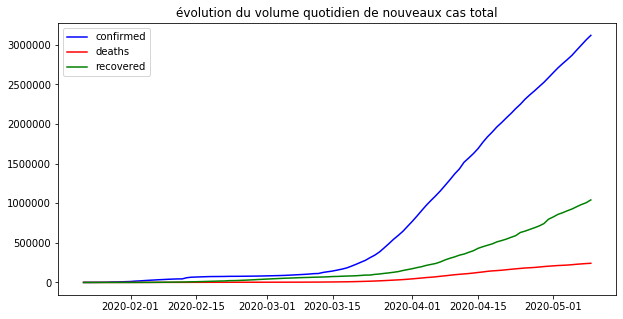

In [111]:
# Evolution du volume quotidien de nouveaux cas total
plt.figure(figsize=(10,5))
plt.plot(confirmed.iloc[:,3:].sum(axis=0),color='blue',label='confirmed')
plt.plot(deaths.iloc[:,3:].sum(axis=0),color='red',label='deaths')
plt.plot(recovered.iloc[:,3:].sum(axis=0),color='green',label='recovered')
plt.legend()
plt.title("évolution du volume quotidien de nouveaux cas total")
plt.show()

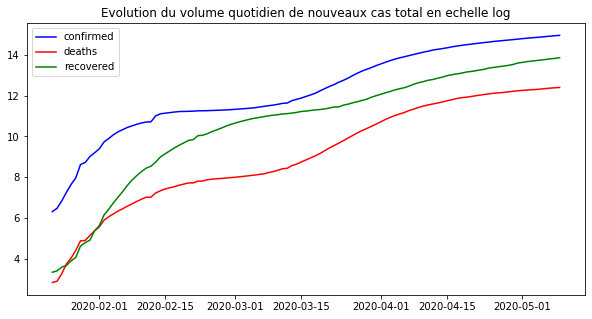

In [112]:
# Evolution du volume quotidien de nouveaux cas total en echelle log
plt.figure(figsize=(10,5))
plt.plot(np.log(confirmed.iloc[:,3:].sum(axis=0)),color='blue',label='confirmed')
plt.plot(np.log(deaths.iloc[:,3:].sum(axis=0)),color='red',label='deaths')
plt.plot(np.log(recovered.iloc[:,3:].sum(axis=0)),color='green',label='recovered')
plt.legend()
plt.title("Evolution du volume quotidien de nouveaux cas total en echelle log")
plt.show()

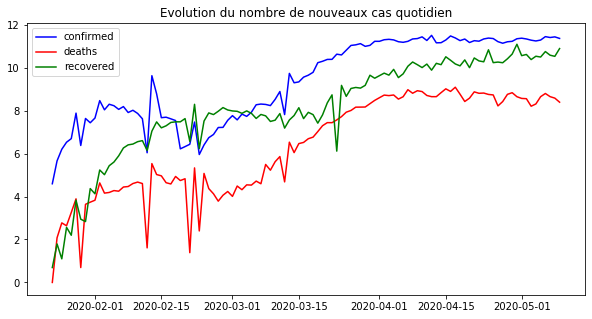

In [113]:
# Evolution du nombre quotidien de nouveaux cas en echelle log
plt.figure(figsize=(10,5))
plt.plot(np.log(confirmed_df_daily.sum(axis=0)),color='blue',label='confirmed') #on somme a chaque fois en colonne
plt.plot(np.log(deaths_df_daily.sum(axis=0)),color='red',label='deaths')
plt.plot(np.log(recovered_df_daily.sum(axis=0)),color='green',label='recovered')
plt.legend()
plt.title("Evolution du nombre de nouveaux cas quotidien")
plt.show()

# Modelisation

### Selection des X et Y

le dataset que l'on prend est le journalier donc *_df_daily.   
On va donc faire un LSTM pour prévoir la valeur à t+1.

In [114]:
## X
confirmed_daily = from_cumul_to_daily(confirmed.iloc[:,3:])
X = confirmed_daily
X.shape

(13, 108)

In [115]:
print(X.iloc[:4,:4].values.tolist())
print('\n')
X.transpose().head()

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 1], [95, 277, 486, 669]]




,0,1,2,3,4,5,6,7,8,9,10,11,12
2020-01-23,0,0,0,95,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,277,2,0,0,0,0,0,0,1,0
2020-01-25,0,0,0,486,1,0,0,0,0,0,0,0,0
2020-01-26,0,0,1,669,0,0,0,0,0,0,0,3,0
2020-01-27,0,0,0,802,0,1,0,0,0,0,0,0,0


#### NOMALISE ET SCALER

In [116]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler()
scaler.fit(X.transpose())
Xscl = scaler.transform(X.transpose())
print(Xscl.shape)

(108, 13)


Pour definir Y on va faire des sliding windows avec pour chaque window de T dates on prendra T+1 pour Y

In [117]:
# univariate one step problem
from keras.preprocessing.sequence import TimeseriesGenerator

# On definit generator
n_input = 1
#generator = TimeseriesGenerator(np.matrix(Xscl.transpose()), np.matrix(X.transpose()), length=n_input, batch_size=1)
generator = TimeseriesGenerator(Xscl,Xscl, length=n_input, batch_size=1)

# Nombre d'echantillon
print('Samples: %d' % len(generator))

# On affiche 2 echantillons Xi et le Yi de chaque.
for i in range(3):
    x, y = generator[i]
    print('%s => %s' % (x, y))

Samples: 107
[[[-1.         -1.         -1.         -0.98744715 -0.82901325
   -1.         -1.         -1.         -1.          0.02054516
   -1.         -1.         -1.        ]]] => [[-1.         -1.         -1.         -0.96339852 -0.82887701 -1.
  -1.         -1.         -1.          0.02054516 -1.         -0.99994473
  -1.        ]]
[[[-1.         -1.         -1.         -0.96339852 -0.82887701
   -1.         -1.         -1.         -1.          0.02054516
   -1.         -0.99994473 -1.        ]]] => [[-1.         -1.         -1.         -0.93578224 -0.82894513 -1.
  -1.         -1.         -1.          0.02054516 -1.         -1.
  -1.        ]]
[[[-1.         -1.         -1.         -0.93578224 -0.82894513
   -1.         -1.         -1.         -1.          0.02054516
   -1.         -1.         -1.        ]]] => [[-1.         -1.         -0.99928006 -0.91160148 -0.82901325 -1.
  -1.         -1.         -1.          0.02054516 -1.         -0.9998342
  -1.        ]]


In [118]:
print(generator[0][0].shape)
print(generator[0][1].shape)

(1, 1, 13)
(1, 13)


In [119]:
X1 = []
Y1 = []

for i in range(len(generator)):
    x, y = generator[i]
    X1.append(x)
    Y1.append(y) 

X1 =np.array(X1)
Y1 =np.array(Y1)

In [120]:
X11 = np.reshape(X1, (X1.shape[0],1,X1.shape[-1]))
Y11 = np.squeeze(Y1)
print(X11.shape)
print(Y11.shape)

(107, 1, 13)
(107, 13)


### Train test split

In [121]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X11, Y11, test_size=0.33)
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape)
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain: (71, 1, 13)
xtest: (36, 1, 13)
ytrain: (71, 13)
ytest: (36, 13)



### Model 1

In [122]:
def lstm_model1(outp, inpt = (1,13)):
    ''' Fonction qui renvoie un modele LSTM sur une representation sequentielle
    des data avec en entree: shape (*,inpt) et en sortie: shape (*, outp) '''

    # en entree du neuronne on aura shape (*,inpt)
    x = Input(shape = inpt) #en input on a (*,nb_features,nb_pays)

    h = LSTM(64, activation = 'tanh')(x) #activation par default est tanh
    #shape de sortie (*,64)
    h = Dense(64)(h)
    #h  = Dense (32)(h)
    h = Dropout(0.25)(h)
    y = Dense(outp, activation='softmax')(h) #to have the right output size

    return Model(inputs=x, outputs=y)


In [123]:
inpt = (xtrain.shape[1],xtrain.shape[2])
outp = ytrain.shape[1]
model1 = lstm_model1(outp,inpt)
model1.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 1, 13)             0         
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                19968     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 13)                845       
Total params: 24,973
Trainable params: 24,973
Non-trainable params: 0
_________________________________________________________________


On va normaliser nos data pour que le modele soit plus performant

In [124]:
#Compilation
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#Fit
callback_2 = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5)
model1.fit(xtrain,ytrain, callbacks = [callback_2], epochs= 200,verbose=0) #mettre verbose=0 pour ne pas afficher


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


### Prediction

In [125]:
# make a prediction
p = model1.predict(xtest)
#on reshape le xtest
xtest = xtest.reshape((xtest.shape[0], xtest.shape[2]))


In [126]:
# invert scaling for forecast
inv_p = scaler.inverse_transform(p)
inv_p[:3]

array([[ 1227.0968,  5578.744 ,  1389.4045,  7568.211 , 12170.384 ,
         3467.966 ,  1598.2631,  3368.844 ,  5616.5435,  9302.795 ,
         2569.79  , 18109.084 ,  4366.8384],
       [ 1227.0972,  5578.7466,  1389.4055,  7568.211 , 12170.386 ,
         3467.9688,  1598.2654,  3368.8972,  5616.5464,  9302.587 ,
         2569.7908, 18109.088 ,  4366.839 ],
       [ 1227.1135,  5578.8564,  1389.4521,  7568.2534, 12170.554 ,
         3468.1624,  1598.5344,  3374.205 ,  5616.664 ,  9283.017 ,
         2569.8323, 18109.383 ,  4366.881 ]], dtype=float32)

In [127]:
# invert scaling for actual
#ytest = ytest.reshape((len(ytest), 13))
inv_y = scaler.inverse_transform(ytest)
inv_y[:3]

array([[0.000e+00, 0.000e+00, 0.000e+00, 3.730e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 2.000e+00, 1.661e+03, 0.000e+00, 1.000e+00,
        0.000e+00, 2.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        2.000e+00],
       [1.000e+00, 0.000e+00, 0.000e+00, 3.991e+03, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]])

In [128]:
from sklearn.metrics import mean_squared_error,auc
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_p))
print('Test RMSE: %.3f' % rmse)

#for i in range(len(inv_y)):
    #p_acc = auc(inv_y[i],inv_p[i])
    #print('acc:',p_acc)

Test RMSE: 5996.385


### Plot prediction

In [129]:
print(inv_p.shape)
confirmed_daily.transpose().head()

(36, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,12
2020-01-23,0,0,0,95,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,277,2,0,0,0,0,0,0,1,0
2020-01-25,0,0,0,486,1,0,0,0,0,0,0,0,0
2020-01-26,0,0,1,669,0,0,0,0,0,0,0,3,0
2020-01-27,0,0,0,802,0,1,0,0,0,0,0,0,0


On crée une matrice vide pret à recupérer les predictions

In [130]:
predict = np.zeros(confirmed_daily.transpose().shape)
predict[:, :] = np.nan
predict = pd.DataFrame(predict,index=confirmed_daily.transpose().index)

date_pred = inv_p.shape[0]
date_reel_last = date_pred + 1
predict.iloc[-date_reel_last,:] = confirmed_daily.transpose().iloc[-date_reel_last,:]
predict.iloc[-date_pred:,:] = inv_p
predict.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


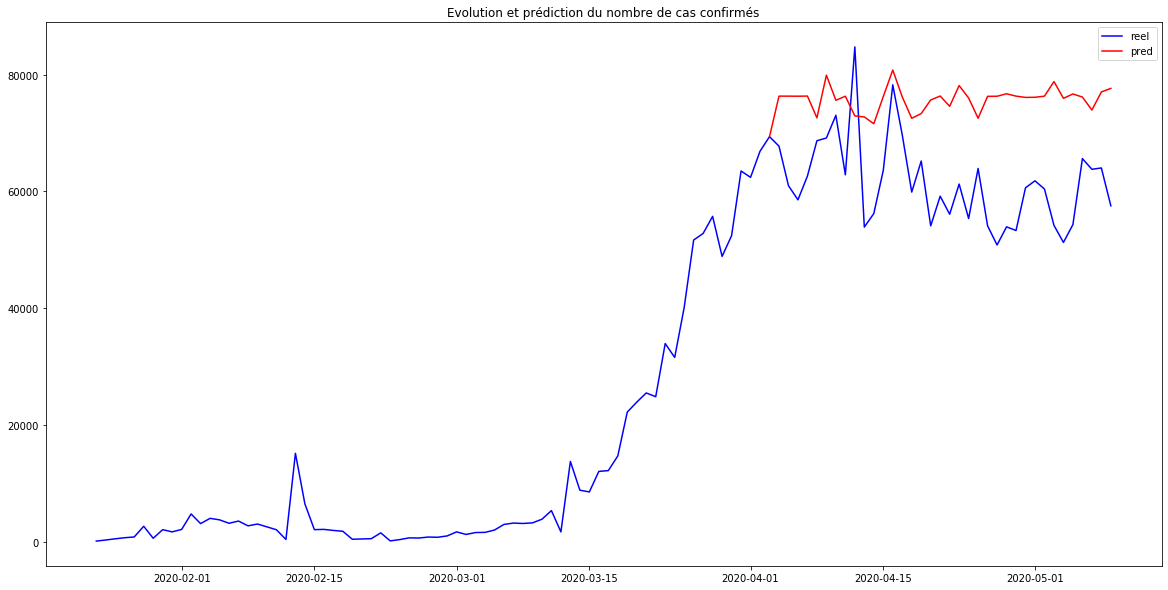

In [131]:
plt.figure(figsize=(20,10))
plt.plot(confirmed_daily.transpose().sum(axis=1),color = 'blue',label='reel')
plt.plot(predict.iloc[-date_reel_last:,:].sum(axis=1),color='red',label='pred')
plt.legend()
plt.title("Evolution et prédiction du nombre de cas confirmés")
plt.show()

## Model 2

In [132]:
## X
confirmed_daily = from_cumul_to_daily(confirmed.iloc[:,3:])
X = confirmed_daily
X.shape

(13, 108)

In [133]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
#scaler = MinMaxScaler()
scaler.fit(X.transpose())
Xscl = scaler.transform(X.transpose())
print(Xscl.shape)

(108, 13)


In [134]:
# univariate one step problem
from keras.preprocessing.sequence import TimeseriesGenerator

# On definit generator
n_input = 32
#generator = TimeseriesGenerator(np.matrix(Xscl.transpose()), np.matrix(X.transpose()), length=n_input, batch_size=1)
generator = TimeseriesGenerator(Xscl,Xscl, length=n_input, batch_size=1)

# Nombre d'echantillon
print('Samples: %d' % len(generator))

# On affiche 2 echantillons Xi et le Yi de chaque.
for i in range(1):
    x, y = generator[i]
    print('%s => %s' % (x, y))

Samples: 76
[[[-1.         -1.         -1.         -0.98744715 -0.82901325
   -1.         -1.         -1.         -1.          0.02054516
   -1.         -1.         -1.        ]
  [-1.         -1.         -1.         -0.96339852 -0.82887701
   -1.         -1.         -1.         -1.          0.02054516
   -1.         -0.99994473 -1.        ]
  [-1.         -1.         -1.         -0.93578224 -0.82894513
   -1.         -1.         -1.         -1.          0.02054516
   -1.         -1.         -1.        ]
  [-1.         -1.         -0.99928006 -0.91160148 -0.82901325
   -1.         -1.         -1.         -1.          0.02054516
   -1.         -0.9998342  -1.        ]
  [-1.         -1.         -1.         -0.89402748 -0.82901325
   -0.99971152 -1.         -1.         -1.          0.02054516
   -1.         -1.         -1.        ]
  [-1.         -1.         -0.99928006 -0.65221987 -0.82894513
   -0.99913457 -1.         -1.         -1.          0.02054516
   -1.         -1.         -1.  

In [135]:
print(generator[0][0].shape)
print(generator[0][1].shape)

(1, 32, 13)
(1, 13)


In [136]:
X1 = []
Y1 = []

for i in range(len(generator)):
    x, y = generator[i]
    X1.append(x)
    Y1.append(y) 

X1 =np.array(X1)
Y1 =np.array(Y1)
X1.shape

(76, 1, 32, 13)

In [137]:
X11 = np.reshape(X1, (X1.shape[0],n_input,X1.shape[-1]))
Y11 = np.squeeze(Y1)
print(X11.shape)
print(Y11.shape)

(76, 32, 13)
(76, 13)


### Train Test Split

In [138]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X11, Y11, test_size=0.33)
print('xtrain:',xtrain.shape)
print('xtest:',xtest.shape)
print('ytrain:',ytrain.shape)
print('ytest:',ytest.shape)

xtrain: (50, 32, 13)
xtest: (26, 32, 13)
ytrain: (50, 13)
ytest: (26, 13)


In [139]:
def lstm_model2(outp, inpt = (10,13)):
    ''' Fonction qui renvoie un modele LSTM sur une representation sequentielle
    des data avec en entree: shape (*,inpt) et en sortie: shape (*, outp) '''

    # en entree du neuronne on aura shape (*,inpt)
    x = Input(shape = inpt) #en input on a (*,nb_features,nb_pays)

    h = LSTM(64, activation = 'tanh')(x) #activation par default est tanh
    #shape de sortie (*,64)
    h = Dense(64)(h)
    #h  = Dense (32)(h)
    h = Dropout(0.25)(h)
    y = Dense(outp, activation='softmax')(h) #to have the right output size

    return Model(inputs=x, outputs=y)

In [140]:
inpt = (xtrain.shape[1],xtrain.shape[2])
outp = ytrain.shape[1]
model1 = lstm_model1(outp,inpt)
model1.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 32, 13)            0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 64)                19968     
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 13)                845       
Total params: 24,973
Trainable params: 24,973
Non-trainable params: 0
_________________________________________________________________


In [141]:
#Compilation
model1.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

#Fit
callback_2 = EarlyStopping(monitor='val_loss', min_delta=0.005, patience=5)
model1.fit(xtrain,ytrain, callbacks = [callback_2], epochs= 200,verbose=0) #mettre verbose=0 pour ne pas afficher

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras/callbacks/callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


### Prediction

In [142]:
# make a prediction
p = model1.predict(xtest)

#on reshape le xtest
#xtest = xtest.reshape((xtest.shape[0], xtest.shape[2]))

# invert scaling for forecast
inv_p = scaler.inverse_transform(p)
inv_p[:3]

# invert scaling for actual
#ytest = ytest.reshape((len(ytest), 13))
inv_y = scaler.inverse_transform(ytest)
inv_y[:3]

array([[5.3000e+02, 1.8320e+03, 1.3550e+03, 9.3000e+01, 4.9710e+03,
        1.2870e+03, 1.5740e+03, 2.9720e+03, 2.7740e+03, 2.4420e+03,
        4.0620e+03, 2.7051e+04, 5.2750e+03],
       [1.6610e+03, 1.3040e+03, 5.4100e+02, 3.2000e+01, 4.2980e+03,
        4.9330e+03, 2.5600e+03, 4.8050e+03, 5.8200e+02, 6.9690e+03,
        3.0130e+03, 3.3283e+04, 3.7880e+03],
       [6.6000e+02, 7.5020e+03, 1.5920e+03, 1.2000e+01, 7.5600e+02,
        1.4700e+03, 9.8300e+02, 1.8720e+03, 7.0990e+03, 5.1800e+02,
        2.6150e+03, 2.9515e+04, 6.0400e+03]])

In [143]:
from sklearn.metrics import mean_squared_error,auc
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_p))
print('Test RMSE: %.3f' % rmse)

#for i in range(len(inv_y)):
    #p_acc = auc(inv_y[i],inv_p[i])
    #print('acc:',p_acc)

Test RMSE: 5415.684


### Plot prediction

In [144]:
print(inv_p.shape)
confirmed_daily.transpose().head()
predict = np.zeros(confirmed_daily.transpose().shape)
predict[:, :] = np.nan
predict = pd.DataFrame(predict,index=confirmed_daily.transpose().index)

(26, 13)


In [145]:
date_pred = inv_p.shape[0]
date_reel_last = date_pred + 1
predict.iloc[-date_reel_last,:] = confirmed_daily.transpose().iloc[-date_reel_last,:]
predict.iloc[-date_pred:,:] = inv_p
predict.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


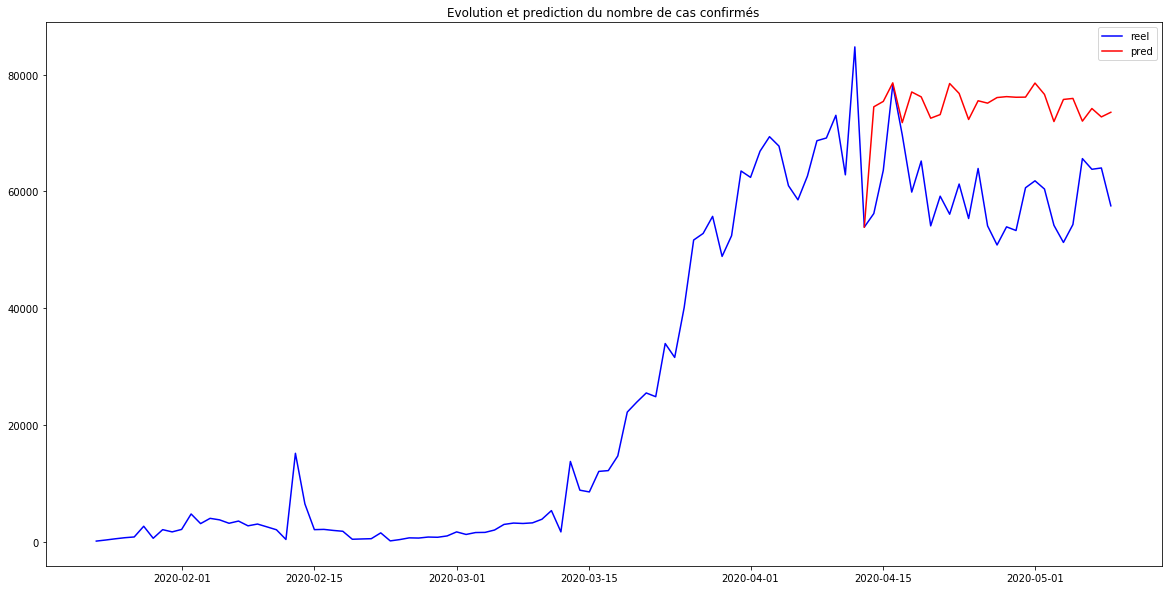

In [146]:
plt.figure(figsize=(20,10))
plt.plot(confirmed_daily.transpose().sum(axis=1),color = 'blue',label='reel')
plt.plot(predict.iloc[-date_reel_last:,:].sum(axis=1),color='red',label='pred')
plt.legend()
plt.title("Evolution et prediction du nombre de cas confirmés")
plt.show()